In [36]:
import pandas as pd
import numpy as np

In [37]:

hospedagens = pd.read_csv('resultado.csv', decimal=".")

In [38]:
hospedagens['checkin'] = pd.to_datetime(hospedagens['checkin'])

In [39]:
hospedagens.head(5)

,hotel,cidade,preço,checkin,checkout,dist_centro,dist_praia,avaliacao,qtnd_avaliacoes,data_extracao
0,TURIM Boulevard Hotel,Lisboa,12144,2024-06-01,2024-06-8,0.9,NaN,8.5,5355.0,2024-5-23
1,Luzeiros Suites,Lisboa,6478,2024-06-01,2024-06-8,3.1,NaN,8.3,3469.0,2024-5-23
2,Lisbon Serviced Apartments - Campos,Lisboa,4067,2024-06-01,2024-06-8,3.9,NaN,8.1,4658.0,2024-5-23
3,Amazonia Lisboa Hotel,Lisboa,3955,2024-06-01,2024-06-8,1.7,NaN,7.8,3126.0,2024-5-23
4,Rua Luciano Cordeiro Bhuiyan Family Host,Lisboa,2150,2024-06-01,2024-06-8,1.3,NaN,8.5,144.0,2024-5-23


In [40]:
# printando quantas linhas de cada coluna está faltante
print(hospedagens.isnull().sum())

hotel                   0
cidade                  0
preço                   0
checkin                 0
checkout                0
dist_centro             0
dist_praia         100650
avaliacao            3894
qtnd_avaliacoes      3894
data_extracao           0
dtype: int64


In [41]:
# exibindo linhas que possuem qntd_de_avaliações mas não possui avaliação
hospedagens[(hospedagens["qtnd_avaliacoes"] > 0) & (hospedagens["avaliacao"].isnull())]

,hotel,cidade,preço,checkin,checkout,dist_centro,dist_praia,avaliacao,qtnd_avaliacoes,data_extracao


In [43]:
num_acomodacoes_per_checkin = hospedagens.groupby('checkin')
num_acomodacoes_per_checkin["preço"].mean()

checkin
2024-06-01    10659.146736
2024-06-08    10316.574682
2024-06-15    10759.161013
2024-06-22     9044.839879
2024-07-01     9526.099598
2024-07-08     9127.248238
2024-07-15     9879.867877
2024-07-22    13696.494955
2024-08-01    15781.603735
2024-08-08    13562.075758
2024-08-15     9856.136502
2024-08-22    10307.631313
2024-09-01    12302.976178
2024-09-08    10905.290339
2024-09-15    11283.494955
2024-09-22    11674.451109
2024-10-01    11065.831823
2024-10-08    10822.807557
2024-10-15    11292.840121
2024-10-22    10641.285714
2024-11-01     9227.395279
2024-11-08     9583.403218
2024-11-15     8718.024084
2024-11-22     8355.217871
2024-12-01     8203.099095
2024-12-08     8153.230422
2024-12-15     8491.344205
2024-12-22    10475.125945
2025-01-01     9555.600406
2025-01-08     9556.175819
2025-01-15     9805.708018
2025-01-22    10016.904137
2025-02-01     9582.289673
2025-02-08     9671.275618
2025-02-15     9729.486146
2025-03-01    10769.152764
2025-03-08    10734.

In [44]:
hospedagens["preço"].mean()

11377.355022354695

<Axes: >

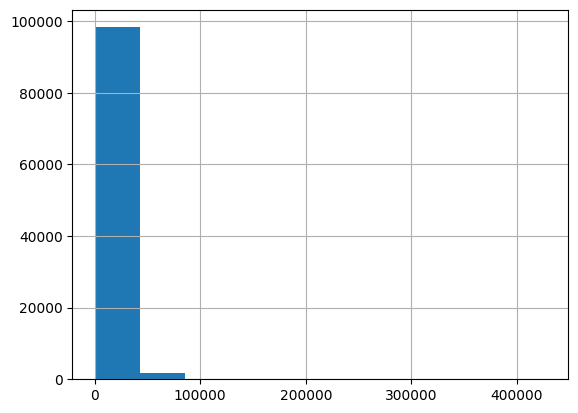

In [34]:
# histograma do preço das hospedagens
hospedagens["preço"].hist()

<Axes: >

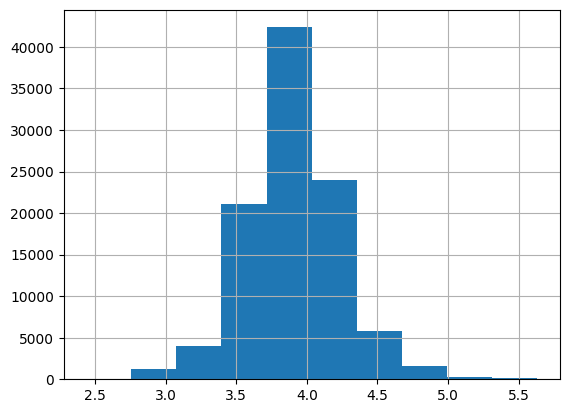

In [35]:
hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)
hospedagens[hospedagens['log_price'] > 0]['log_price'].hist()

In [8]:
# calculando a média
hospedagens[(hospedagens["preço"] < 350) & (hospedagens['checkin'] == '2025-01-01')]

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao
12,Oxen Hostel 2024,Recife,226,2025-01-01,2025-01-08,0.45,NaN,6.0,2024-5-16
17,Lê'Frevo Pernambucano Hostel,Recife,298,2025-01-01,2025-01-08,0.60,3.0,7.5,2024-5-16
55,Hostel Brasil Recife,Recife,347,2025-01-01,2025-01-08,7.50,NaN,9.0,2024-5-16
57,Pousada Solar do Lazer,Recife,268,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16
112,Hostel solar do lazer,Recife,274,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16
115,Pousada Solar do Lazer,Recife,274,2025-01-01,2025-01-08,0.50,NaN,NaN,2024-5-16


In [45]:
# calculando a mediana
hospedagens["preço"].median()

7741.0

In [46]:
hospedagens["preço"].std()

18919.258032602065

In [47]:
hospedagens["preço"].describe()

count    100650.000000
mean      11377.355022
std       18919.258033
min         274.000000
25%        5043.000000
50%        7741.000000
75%       12331.000000
max      427300.000000
Name: preço, dtype: float64

<Axes: >

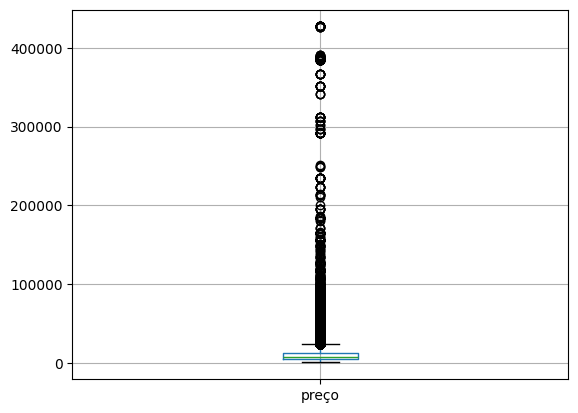

In [48]:
hospedagens.boxplot(column=['preço'])

In [49]:
hospedagens[hospedagens["preço"] > 400000]

,hotel,cidade,preço,checkin,checkout,dist_centro,dist_praia,avaliacao,qtnd_avaliacoes,data_extracao
91981,Hôtel Bourgogne & Montana,Paris,427300,2025-05-22,2025-05-29,2.5,NaN,8.7,539.0,2024-5-23
91998,Hôtel Madison,Paris,426329,2025-05-22,2025-05-29,1.3,NaN,8.7,582.0,2024-5-23
92384,Hôtel Artus,Paris,427300,2025-05-22,2025-05-29,1.2,NaN,8.9,600.0,2024-5-23
92385,"Terrass"" Hotel",Paris,427300,2025-05-22,2025-05-29,3.6,NaN,8.9,1113.0,2024-5-23
93950,Hôtel Bourgogne & Montana,Paris,427300,2025-06-01,2025-06-8,2.5,NaN,8.7,539.0,2024-5-23
93962,Hôtel Artus,Paris,427300,2025-06-01,2025-06-8,1.2,NaN,8.9,600.0,2024-5-23
93979,Hôtel Madison,Paris,426329,2025-06-01,2025-06-8,1.3,NaN,8.7,582.0,2024-5-23
94374,"Terrass"" Hotel",Paris,427300,2025-06-01,2025-06-8,3.6,NaN,8.9,1113.0,2024-5-23
95892,Hôtel Bourgogne & Montana,Paris,427300,2025-06-08,2025-06-15,2.5,NaN,8.7,539.0,2024-5-23
95912,Hôtel Artus,Paris,427300,2025-06-08,2025-06-15,1.2,NaN,8.9,600.0,2024-5-23


In [65]:
hospedagens["dist_centro"].min()

0.2

In [66]:
# média de preços por checkin
hospedagens_groupby = hospedagens.groupby("checkin")
hospedagens_groupby = hospedagens_groupby["preço"].mean()
print(hospedagens_groupby)

Checkin
2025-01-01    2876.182741
2025-01-08    2492.284722
2025-01-15    2468.989691
2025-01-22    2469.152778
Name: Preço, dtype: float64


<Axes: xlabel='Preço', ylabel='Avaliacao'>

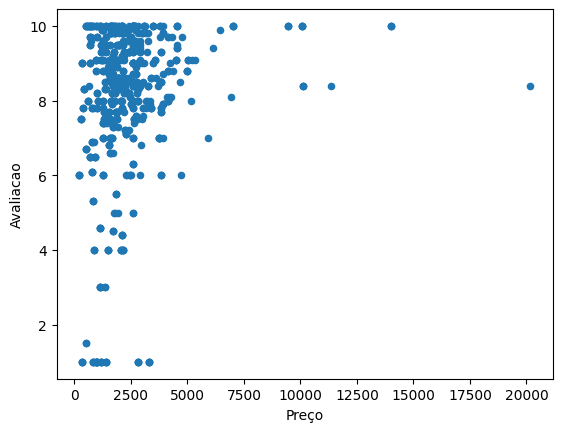

In [15]:
hospedagens.plot.scatter(x='Preço',y='Avaliacao')

In [20]:
hospedagens[["Preço", "Dist_centro", "Avaliacao", "Dist_praia"]].cov()

,Preço,Dist_centro,Avaliacao,Dist_praia
Preço,4.939376e+06,4989.229063,680.308106,-305.381865
Dist_centro,4.989229e+03,43.645414,1.058454,-1.585752
Avaliacao,6.803081e+02,1.058454,4.114220,-0.255998
Dist_praia,-3.053819e+02,-1.585752,-0.255998,0.536965


In [26]:
hospedagens[["Preço", "Dist_centro"]].corr(method='spearman')

,Preço,Dist_centro
Preço,1.000000,0.339804
Dist_centro,0.339804,1.000000


In [27]:
from scipy import stats
stats.shapiro(hospedagens["Preço"])

ShapiroResult(statistic=0.6770361551339386, pvalue=6.804946029645032e-41)

<Axes: >

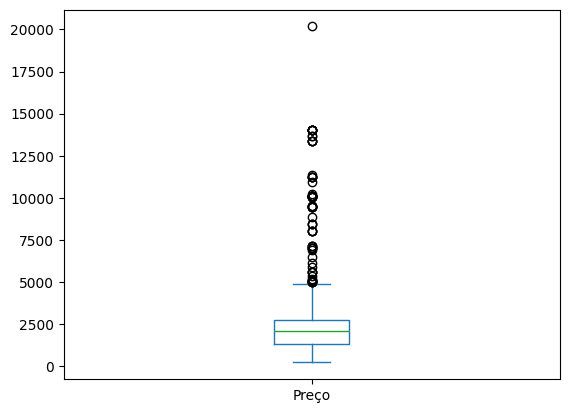

In [28]:
hospedagens[['Preço']].plot(kind='box')

In [32]:
# Filtra os dados para as duas datas específicas
data_1 = hospedagens[hospedagens["Checkin"] == '2025-01-01']
data_2 = hospedagens[hospedagens["Checkin"] == '2025-01-08']

# Encontra os hotéis que possuem check-in em ambas as datas
hoteis_comuns = set(data_1["Hotel"]).intersection(set(data_2["Hotel"]))

# Filtra os DataFrames para manter apenas os hotéis que possuem check-in em ambas as datas
data_1_filtrada = data_1[data_1["Hotel"].isin(hoteis_comuns)]
data_2_filtrada = data_2[data_2["Hotel"].isin(hoteis_comuns)]

# Ordena os DataFrames pelos hotéis para garantir alinhamento
data_1_filtrada = data_1_filtrada.sort_values("Hotel")
data_2_filtrada = data_2_filtrada.sort_values("Hotel")

# Extrai os preços dos hotéis filtrados e ordenados
precos_data_1 = data_1_filtrada["Preço"]
precos_data_2 = data_2_filtrada["Preço"]

stats.wilcoxon(precos_data_1, precos_data_2)

ValueError: operands could not be broadcast together with shapes (186,) (189,) 

In [72]:
hospedagens[hospedagens[["Hotel", "Checkin"]].duplicated() == True].sort_values(by="Hotel")

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao
446,Apartamento Beira Mar em Recife,Recife,13650,2025-01-08,2025-01-15,14.1,0.5,NaN,2024-5-16
1025,Apartamento Beira Mar em Recife,Recife,9450,2025-01-22,2025-01-29,14.1,0.5,NaN,2024-5-16
735,Apartamento Beira Mar em Recife,Recife,10950,2025-01-15,2025-01-22,14.1,0.5,NaN,2024-5-16
251,Duplex,Recife,714,2025-01-08,2025-01-15,0.7,NaN,NaN,2024-5-16
837,Duplex,Recife,714,2025-01-22,2025-01-29,0.7,NaN,NaN,2024-5-16
541,Duplex,Recife,714,2025-01-15,2025-01-22,0.7,NaN,NaN,2024-5-16
556,Flat Beach Class Executive,Recife,2520,2025-01-15,2025-01-22,4.3,0.0,7.9,2024-5-16
846,Flat Beach Class Executive,Recife,2520,2025-01-22,2025-01-29,4.3,0.0,7.9,2024-5-16
1014,Flat em Boa Viagem,Recife,4760,2025-01-22,2025-01-29,9.9,0.8,NaN,2024-5-16
759,Flat em Boa Viagem,Recife,2673,2025-01-15,2025-01-22,7.0,0.7,NaN,2024-5-16


In [74]:
hospedagens = hospedagens.drop(hospedagens[hospedagens[["Hotel", "Checkin"]].duplicated() == True].index, axis=0)

In [75]:
hospedagens

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao
0,Veja o mar no silêncio do centro! Hospede-se n...,Recife,428,2025-01-01,2025-01-08,0.2,2.5,8.3,2024-5-16
1,Hotel Dan Inn Mar Piedade - Grande Recife,Recife,2101,2025-01-01,2025-01-08,13.7,0.0,7.8,2024-5-16
2,Villa d'Oro Hotel,Recife,2136,2025-01-01,2025-01-08,1.4,2.9,8.6,2024-5-16
3,Lindo APT Cinza à 50m do mar - Praia de Boa Vi...,Recife,1017,2025-01-01,2025-01-08,5.8,NaN,10.0,2024-5-16
4,Aconchegante Apto de 1qt a 60mts do Consulado EUA,Recife,1011,2025-01-01,2025-01-08,1.2,NaN,9.7,2024-5-16
...,...,...,...,...,...,...,...,...,...
1059,Aconchego Boa Viagem,Recife,4032,2025-01-22,2025-01-29,8.4,NaN,NaN,2024-5-16
1060,Golden home service,Recife,7013,2025-01-22,2025-01-29,7.0,0.6,10.0,2024-5-16
1061,RESERVA DO PAIVA - A MELHOR CASA PARA TEMPORADA,Recife,10121,2025-01-22,2025-01-29,26.6,0.0,8.4,2024-5-16
1062,Cond Clube em Piedade noCarnaval,Recife,11246,2025-01-22,2025-01-29,15.7,1.0,NaN,2024-5-16


In [76]:
# Filtra os dados para as duas datas específicas
data_1 = hospedagens[hospedagens["Checkin"] == '2025-01-01']
data_2 = hospedagens[hospedagens["Checkin"] == '2025-01-08']

# Encontra os hotéis que possuem check-in em ambas as datas
hoteis_comuns = set(data_1["Hotel"]).intersection(set(data_2["Hotel"]))

# Filtra os DataFrames para manter apenas os hotéis que possuem check-in em ambas as datas
data_1_filtrada = data_1[data_1["Hotel"].isin(hoteis_comuns)]
data_2_filtrada = data_2[data_2["Hotel"].isin(hoteis_comuns)]

# Ordena os DataFrames pelos hotéis para garantir alinhamento
data_1_filtrada = data_1_filtrada.sort_values("Hotel")
data_2_filtrada = data_2_filtrada.sort_values("Hotel")

# Extrai os preços dos hotéis filtrados e ordenados
precos_data_1 = data_1_filtrada["Preço"]
precos_data_2 = data_2_filtrada["Preço"]

stats.wilcoxon(precos_data_1, precos_data_2)

WilcoxonResult(statistic=26.5, pvalue=1.0277022774489609e-13)

: 

In [52]:
hospedagens.dtypes

Hotel                    object
Cidade                   object
Preço                     int64
Checkin          datetime64[ns]
Checkout                 object
Dist_centro             float64
Dist_praia              float64
Avaliacao               float64
Data_extracao            object
dtype: object

,Hotel,Cidade,Preço,Checkin,Checkout,Dist_centro,Dist_praia,Avaliacao,Data_extracao,Checkin_Preco
371,#403 Quádruplo em Boa Viagem por Carpediem,Recife,2580,2025-01-08,2025-01-15,6.4,0.55,9.0,2024-5-16,2025-01-08_2580
951,#403 Quádruplo em Boa Viagem por Carpediem,Recife,2580,2025-01-22,2025-01-29,6.4,0.55,9.0,2024-5-16,2025-01-22_2580
660,#403 Quádruplo em Boa Viagem por Carpediem,Recife,2580,2025-01-15,2025-01-22,6.4,0.55,9.0,2024-5-16,2025-01-15_2580
308,Aconchegante ótima localização e vista para o mar,Recife,1890,2025-01-08,2025-01-15,0.3,2.60,8.3,2024-5-16,2025-01-08_1890
457,Apartamento Alice Tenório,Recife,1960,2025-01-08,2025-01-15,6.1,0.40,9.5,2024-5-16,2025-01-08_1960
...,...,...,...,...,...,...,...,...,...,...
580,quintal293,Recife,1260,2025-01-15,2025-01-22,0.4,2.20,9.9,2024-5-16,2025-01-15_1260
869,quintal293,Recife,1260,2025-01-22,2025-01-29,0.4,2.20,9.9,2024-5-16,2025-01-22_1260
62,quintal293,Recife,1260,2025-01-01,2025-01-08,0.4,2.20,9.9,2024-5-16,2025-01-01_1260
288,quintal293,Recife,1260,2025-01-08,2025-01-15,0.4,2.20,9.9,2024-5-16,2025-01-08_1260


In [59]:
hospedagens = hospedagens.drop('Checkin_Preco', axis=1)